# Flatiron Data Science Project 1: The King County Housing Data Set
### Matthew Freeman - 8th March 2019


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### The project will use data science methods in the Python 3 language to explore the King County Housing Data Set. This data set contains real data points on house sale prices between May 2014 and June 2015 within King County, WA, U.S.A. and some house details which may or may not have influenced pricing. This investigation shall be using a multivariate linear regression to try to create a model which can predict house prices from these added details, and will also attempt to answer three questions posed by myself below.

> #### <font color=red> Question A: What can be inferred about this data set from its exposure to misfitting?
> 
> #### <font color=blue> Question B: Where are the higher valued houses in King County located AND how best can I improve my model with location related data?
> 
> #### <font color=green> Question C: How much more accurate and reliable can a price prediction be based on a multivariate linear regression rather than the single most correlated variable?


#### This investigation will roughly follow the OSEMN data science process, with some iteration and backward steps being employed where investigation requires it. This means that I will be trying to carry out the investigation in five steps: <br><br> First, I shall Obtain the data: gathering whatever is needed from the required sources. <br> Second, I shall Scrub the data set: finding missing or incorrectly labelled data points and preparing the data for the best analysis possible. <br> Third, I shall Explore the dataset: looking for patterns and anomalies across statistical distributions and correlations which can inform my investigation strategy. <br> Fourth, I shall Model the data: iterating different models to settle on one with the most significant predictive power and using appropriate methods to check validity. <br> Fifth, and finally, I shall iNterpret the results of our investigation: I shall discuss their predictive reliability and  their success in answering the questions.

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Step 1: Obtain

##### Aims: Import libraries and functions to be used throughout investigation; detail kernel used; apply any plotting settings; and most importantly, store data set in a dataframe for easy manipulation.

In [2]:
# Note: This code is written in Python 3 using the "learn-env" kernel.

# Import pandas for dataframe usage.
import pandas as pd
# Import matplotlib.pyplot for basic plotting.
import matplotlib.pyplot as plt
# Import seaborn for advanced plotting and plot styling.
import seaborn as sns
# Import numpy for mathematical functions.
import numpy as np
# Import statsmodels for statistics functions.
import statsmodels.formula.api as smf

# Set plotting style and appearance magic.
plt.style.use('ggplot')
%matplotlib inline

In [5]:
# The data set is saved as kc_house_data.csv within this directory. I shall read it into a Pandas dataframe.
kc_df = pd.read_csv('kc_house_data.csv')

## Step 2: Scrub

##### Aims: Look through data for missing values, mislabelled data, poorly captured data points or categories, etc.; seek most appropriate solution; fix data as best possible.

In [13]:
# This data set is small enough in size that I am confident it would be possible to get a good feel for it
# by displaying the first few rows.
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
# Now let's check the column data types and sizes, as well as see all the variables available to us.
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Interesting. There are 21 columns and I can see already that some are not in the correct data type or are shorter than others. Let's go through these columns in detail.

**id**: This variable relates to numbers identifying the property sold. As we have no key relating to these properties id codes, or any knowledge of methodology in assigning these id codes, we can remove this column as it is useless to us. We can simply rely on the pandas index for this dataframe for such a purpose.

**date**: This variable contains dates, entered in a text format. Dates can be most easily understood by python if they are reformatted into a purely numerical date format, which pandas functionality exists to allow. There may likely also be incorrectly written dates in this column which we must check for and deal with as best as possible.

**price**: This variable contains assumedly USD sale prices for the properties. They are mostly rounded to 1 decimal place which is an odd choice when most properties have a price rounded to the nearest hundred or thousand dollars anyway. After better understanding how erroneous data points may be included it would be preferable to round up to the nearest dollar as it would look neater in plots and a single decimal point is no more correct a rounding choice. 
This variable is the PREDICTION TARGET and should also be copied into a separate pandas series for later use.

**bedrooms**: This variable contains low integers representing the number of bedrooms in the house sold. Thankfully the data type of the series seems appropriate for this. As long as there are no mistakenly high or low numbers this may be as accurate as possible.

**bathrooms**: This variable should be the same as the bedrooms variable, but for the number of bathrooms. Sadly, the series data type seems to be including more than just integers as it is a floating point. This should be fixed.

**sqft_living, sqft_lot**: These variables are for the square foot area of the living space and lot, respectively. They are recorded as appropriately sized integers so they should probably not require much scrubbing.

**floors**: This variable is the number of floors in the house. This series seems to be recorded as a floating point number. I think it should be an integer but I'll check to see if there are lots of cases with mezzanines or something like that before fixing.

**waterfront**: This variable records whether the house has a view of the waterfront. This should be a boolean variable but it currently is not. It also has some records missing. Those with waterfront views should be a minority so I shall probably set any missing or unclear data points to be False.

**view**: This variable represents whether the property has been viewed or not. I would think that this should be boolean and True for most properties. This has a different data type right now so I should probably fix that after checking if my assumption is correct. There are also a few missing values which could probably be replaced with the series mode.

**condition**: This variable represents the condition of the property. All I can tell is that it is currently an integer type so I shall look at this further.

**grade**: Like condition but from a County assigned grading system. Seemingly 1-10?

**sqft_above, sqft_basement**: Square footage, again like earlier but for the house excluding and basement, and for just the basement. It looks like many houses will have a zero classification for sqft_basement because they have no basement. sqft_basement could also use being recast as an integer type.

**yr_built, yr_renovated**: yr_built should just be a year when the house was built. These are integers, which is fine for our purposes. yr_renovated is the year of most recent renovation. This should be recast from floating to integers. There are many missing values but not enough to ignore the entire series. Houses built in certain years will have a distribution of renovation years depending on the built year. We might be able to glean from looking at these distributions whether we could just use a mean for the year built. Or it might be the case that missing values are almost all for very recently built houses, in which case they might never have been renovated. There may be multicolinearity problems with these columns. This will require further investigation.

**zipcode**: This is the zipcode of the property. This is a classification which should be put into a one-hot format, possibly with bunching if that can be reasonably approved. I am not sure how well these variables will work in the model. This variable currently has the correct integer type and no missing values.

**lat, long**: More location related information. These are floating point numbers, and rightly so, representing latitude and longitude vectors of the property's location. No missing data points. I suspect these will not work well for linear representation but could work well with some kind of radial dimension to be worked out. An additional option should be calculated and added to our independant variables.

**sqft_living15, sqft_lot15**: These are the square footage integers for living space and lot space for the closest 15 neighbours. I suspect these are valuable columns which may be even more valuable in some kind of function as well or instead of. Further investigation needed.

#### In the below cells I shall check the validity of each series of data points and their distributions and fix any bad data as suggested above.

In [16]:
# id
# This column of the dataframe shall simply be deleted.

kc_df.drop('id', axis=1, inplace=True)

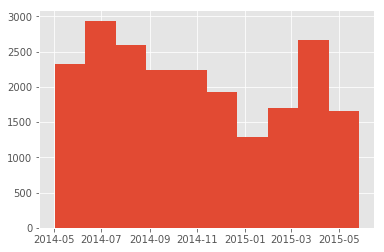

In [25]:
# date
# Convert from text to a date format, check for errors.

kc_df.date = pd.to_datetime(kc_df.date)
# Visually check all correct dates within our range with histogram.
kc_df.date.hist()
plt.title('Histogram of House Sale Dates')
plt.xlabel('Date of Sale')
plt.ylabel('Frequency')

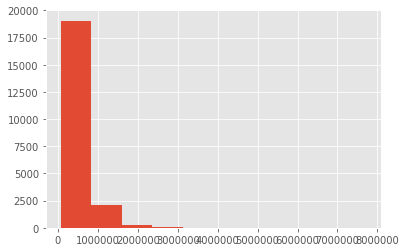

In [27]:
# price
# Visual check for errors, then round to integer and cast as int64.
kc_df.price.hist()
plt.title('Histogram of House Prices')
plt.xlabel('Price at Sale')
plt.ylabel('Frequency')
kc_df.price = kc_df.price.astype(int)

In [32]:
# bedrooms
# Check for no erroneously high or low numbers, otherwise fine to be left alone.
kc_df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [35]:
# bedrooms continued 
# Above data looks okay, let's just check that 33 bedroom house has appropriate properties correct for a mega mansion.
kc_df.loc[kc_df.bedrooms == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [37]:
# bedrooms continued
# This bedroom number doesn't make sense for this property and it also has erroneous yr_renovated data so I shall 
# remove this row.
kc_df.drop([15856], inplace=True)

In [39]:
# bathrooms
# Check value counts and then try to cast to integer.
kc_df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#bathrooms continued

It looks like I was wrong about this data as everything seems to be rounded to the nearest quarter. Unless the data was collected incorrectly I think I can assume that this is correct and should be left alone as it is still perfectly usable as is.

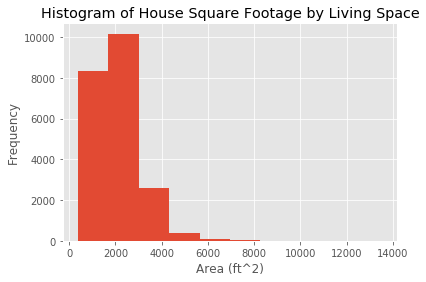

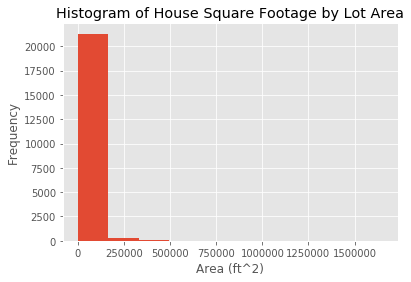

In [73]:
# sqft_living, sqft_lot
# Just check for errorneously large or small values.

kc_df.sqft_living.plot(kind='hist')
plt.title('Histogram of House Square Footage by Living Space')
plt.xlabel("Area (ft^2)")
plt.ylabel('Frequency')
plt.show()

kc_df.sqft_lot.plot(kind='hist')
plt.title('Histogram of House Square Footage by Lot Area')
plt.xlabel("Area (ft^2)")
plt.ylabel('Frequency')
plt.show()

In [74]:
# The above series do not need scrubbing.

# floors
# See what values exist and cast to integer if reasonable.

kc_df.floors.value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [75]:
# Looks like lots of people have mezzanines. That is fine, we can leave this data as it is.

# waterfront
# This should probably be boolean. There are also missing values. Let's check if it should be boolean based on what values
# are already used and fill any missing values with False, if that is the mode, as most houses probably aren't 
# on the waterfront.

kc_df.waterfront.value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

In [78]:
# waterfront continued
# Yes, this looks to be the case. The sum of values, 19,220 is also less than the column length 21,596. So I shall 
# fill missing values with 0.0, cast to boolean type, and then check the value counts again.

kc_df.waterfront.fillna(value=0.0)
kc_df.waterfront = kc_df.waterfront.astype(bool)
kc_df.waterfront.value_counts()

False    19074
True      2522
Name: waterfront, dtype: int64

In [79]:
# That is better.

# view
# This should be quite similar to how we dealt with waterfront. Check the values first.
kc_df.view.value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [81]:
# view continued
# I'll admit, the key for this data set doesn't describe this well enough. The only thing which seems wrong are the missing
# values noticed earlier. I'll fix (set to significantly largest mode) and check those now.
#It might be best to bin classifications for non-zero before one-hot encoding later.

kc_df.fillna(value=0.0, inplace=True)
kc_df.view.value_counts()

0.0    19484
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [82]:
# That's better.

# condition
# This should probably be fine, I'll just check values.
kc_df.condition.value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

In [83]:
# Ok, a 1-5 scale is fine.

# grade
# This should be like the above, but I believe it is a 1-10 scale. Let's check.
kc_df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [ ]:
# Interesting. This is probably like a 1-15 scale which happens to have no extreme values. Data looks quite normal so I
# am happy to leave this as is.

# sqft_above
# This should be fine. Let's just check there are no erroneously high or low values in a histogram.
kc_df.sqft_above.hist()

## Step 3: Explore

##### Aims: Check statistical measures of data set variables, analyse distributions of data set variables, locate anomalies, and consider different uses for variables.

## Step 4: Model

##### Aims: Create multivariate linear regression model, iterating for best variables to use or avoid, best split ratio to use, and check for validity.

## Step 5: Interpret

##### Aims: Discuss predictive power and reliability of model, answer questions, debate level of success in answering questions, and discuss proposals for future improvements to the model.  